In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("../input/tabular-playground-series-jun-2022/data.csv")
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [3]:
df.shape

(1000000, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   row_id  1000000 non-null  int64  
 1   F_1_0   981603 non-null   float64
 2   F_1_1   981784 non-null   float64
 3   F_1_2   981992 non-null   float64
 4   F_1_3   981750 non-null   float64
 5   F_1_4   981678 non-null   float64
 6   F_1_5   981911 non-null   float64
 7   F_1_6   981867 non-null   float64
 8   F_1_7   981872 non-null   float64
 9   F_1_8   981838 non-null   float64
 10  F_1_9   981751 non-null   float64
 11  F_1_10  982039 non-null   float64
 12  F_1_11  981830 non-null   float64
 13  F_1_12  981797 non-null   float64
 14  F_1_13  981602 non-null   float64
 15  F_1_14  981961 non-null   float64
 16  F_2_0   1000000 non-null  int64  
 17  F_2_1   1000000 non-null  int64  
 18  F_2_2   1000000 non-null  int64  
 19  F_2_3   1000000 non-null  int64  
 20  F_2_4   1000000 non-null 

# Observations:

* The float columns are missing values, the integers are not.

In [5]:
feature_cols = [i for i in df.columns if "F" in i]
float_cols = [i for i in df.columns if df[i].dtype == float]
int_cols = [i for i in df.columns if df[i].dtype == int and "F" in i]

In [6]:
print("There are: ", len(float_cols), "float features")
print("There are: ", len(int_cols), "integer features")

There are:  55 float features
There are:  25 integer features


In [7]:
colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen", "lightseagreen",
          "cornflowerblue", "mediumpurple", "palevioletred", "lightskyblue", "sandybrown",
          "yellowgreen", "indianred", "lightsteelblue", "mediumorchid", "deepskyblue"]

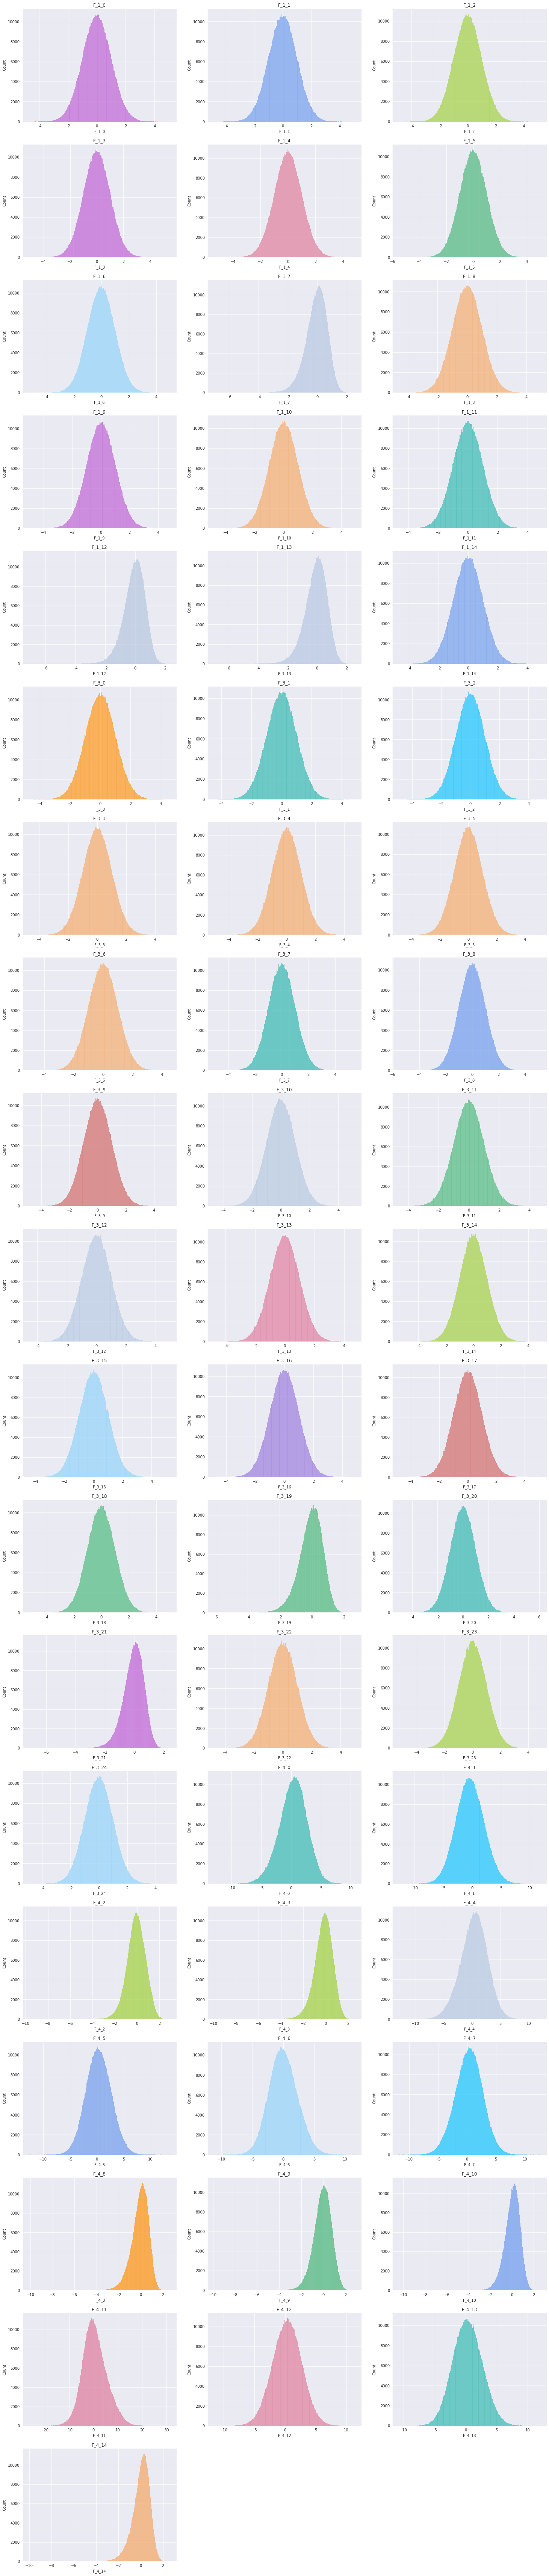

In [8]:
plt.subplots(figsize=(25,125))
for i, column in enumerate(float_cols):
    plt.subplot(19,3,i+1)
    sns.histplot(data=df, x=column, color=random.choice(colors))
    plt.title(column)

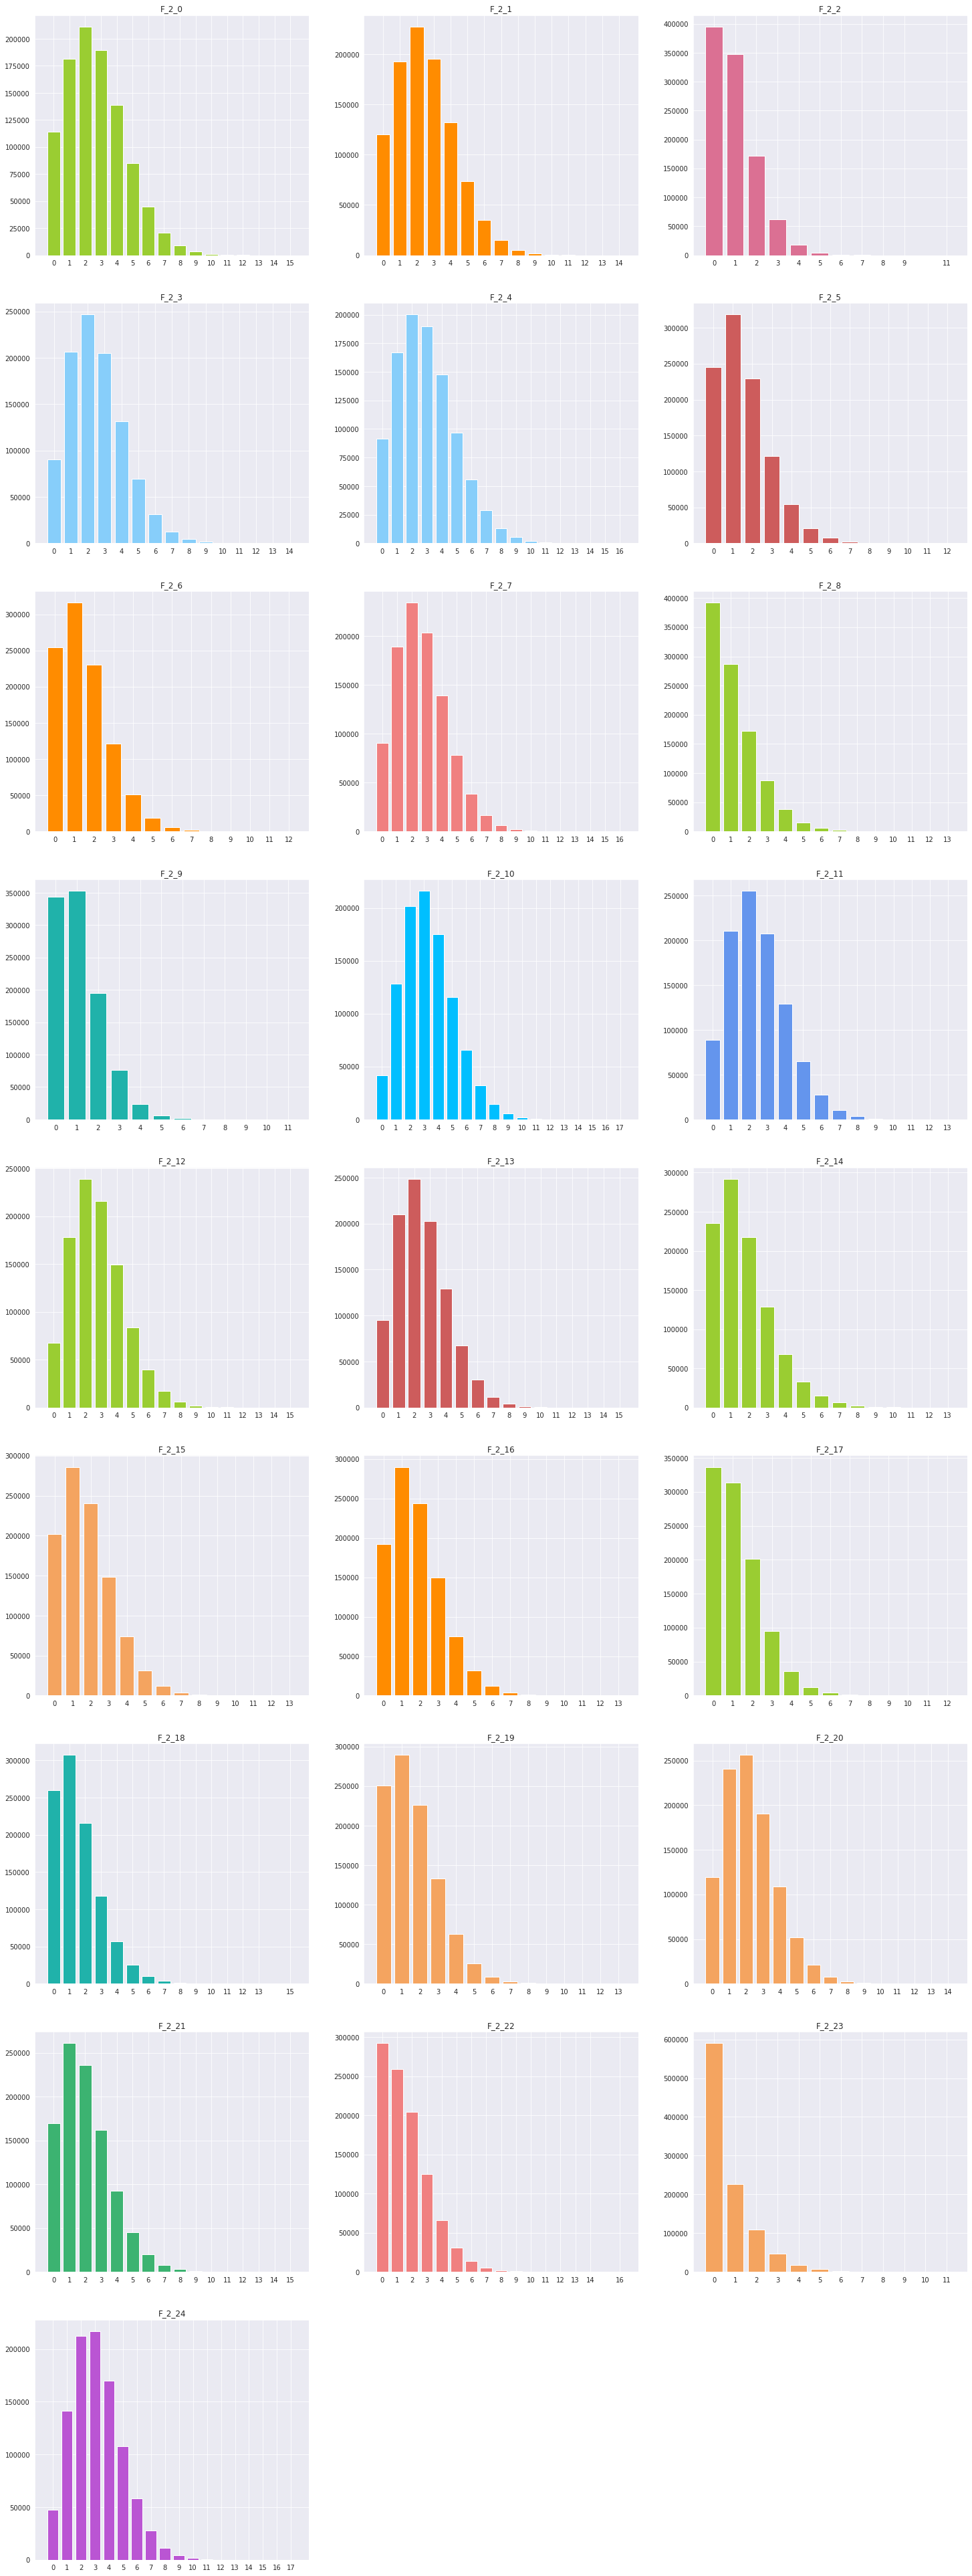

In [9]:
plt.subplots(figsize=(25,70))
for i, column in enumerate(int_cols):
    val_count = df[column].value_counts()
    ax = plt.subplot(9,3,i+1)
    #sns.barplot(x=val_count.index,y=val_count.values)
    ax.bar(val_count.index, val_count.values, color=random.choice(colors))
    ax.set_xticks(val_count.index)
    plt.title(column)


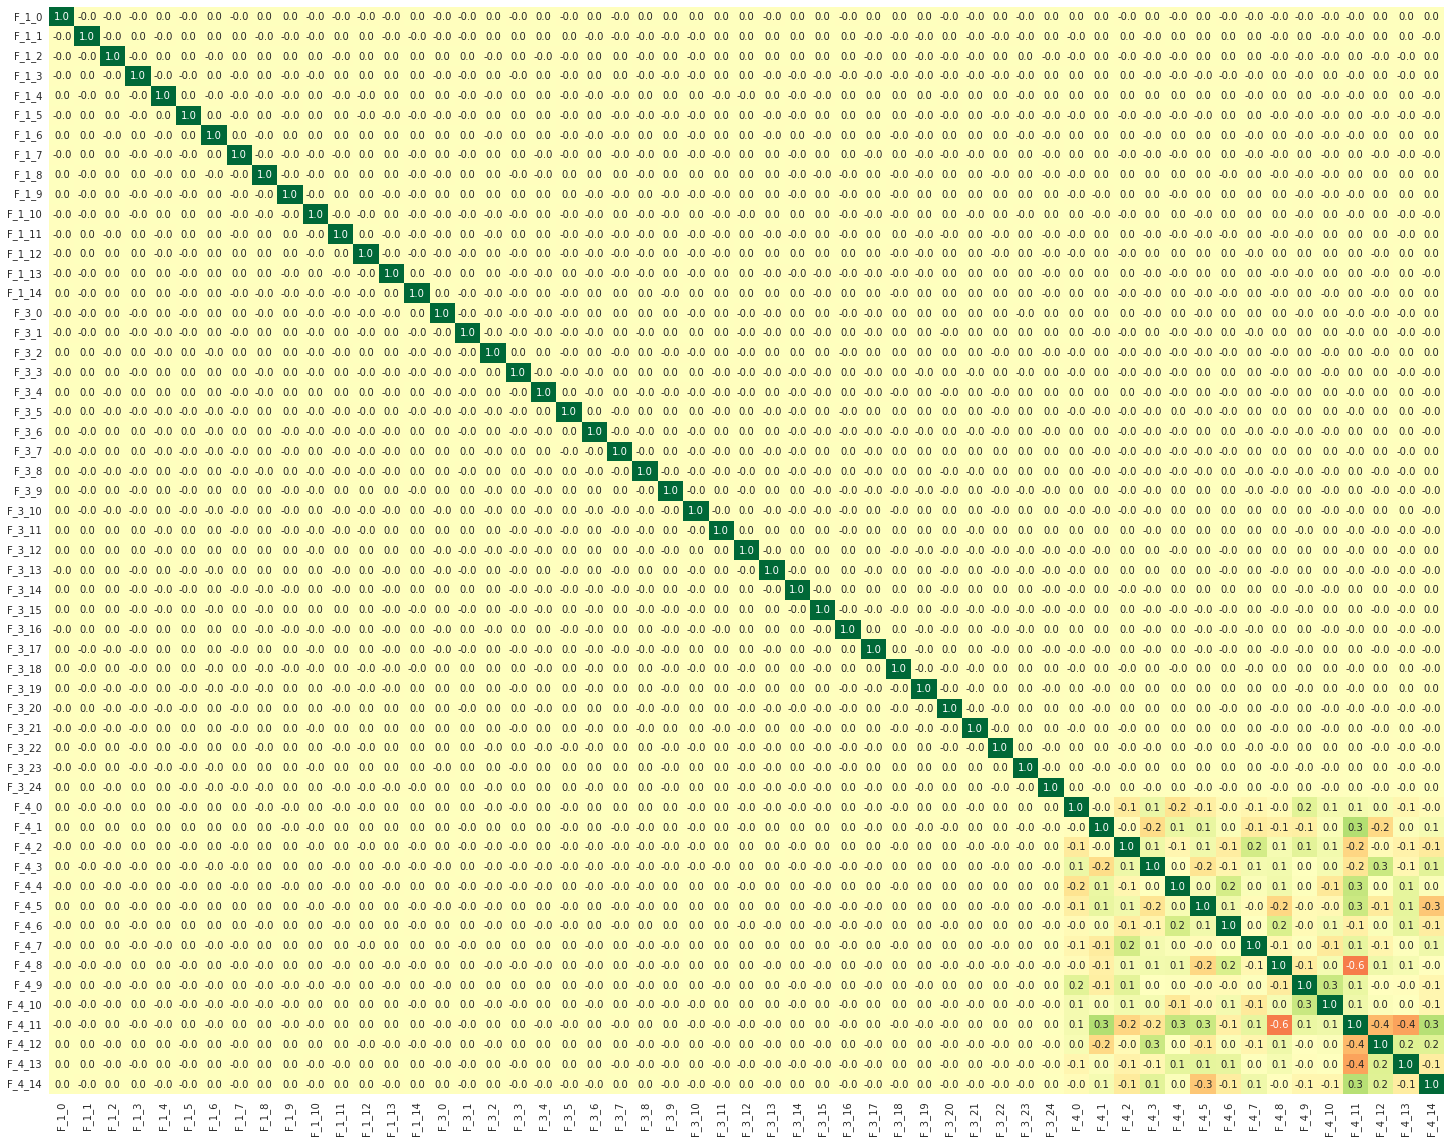

In [10]:
plt.subplots(figsize=(25,20))
sns.heatmap(df[float_cols].corr(), annot= True, cmap="RdYlGn", fmt = '0.1f', vmin=-1, vmax=1, cbar=False);

## Correlations between features:

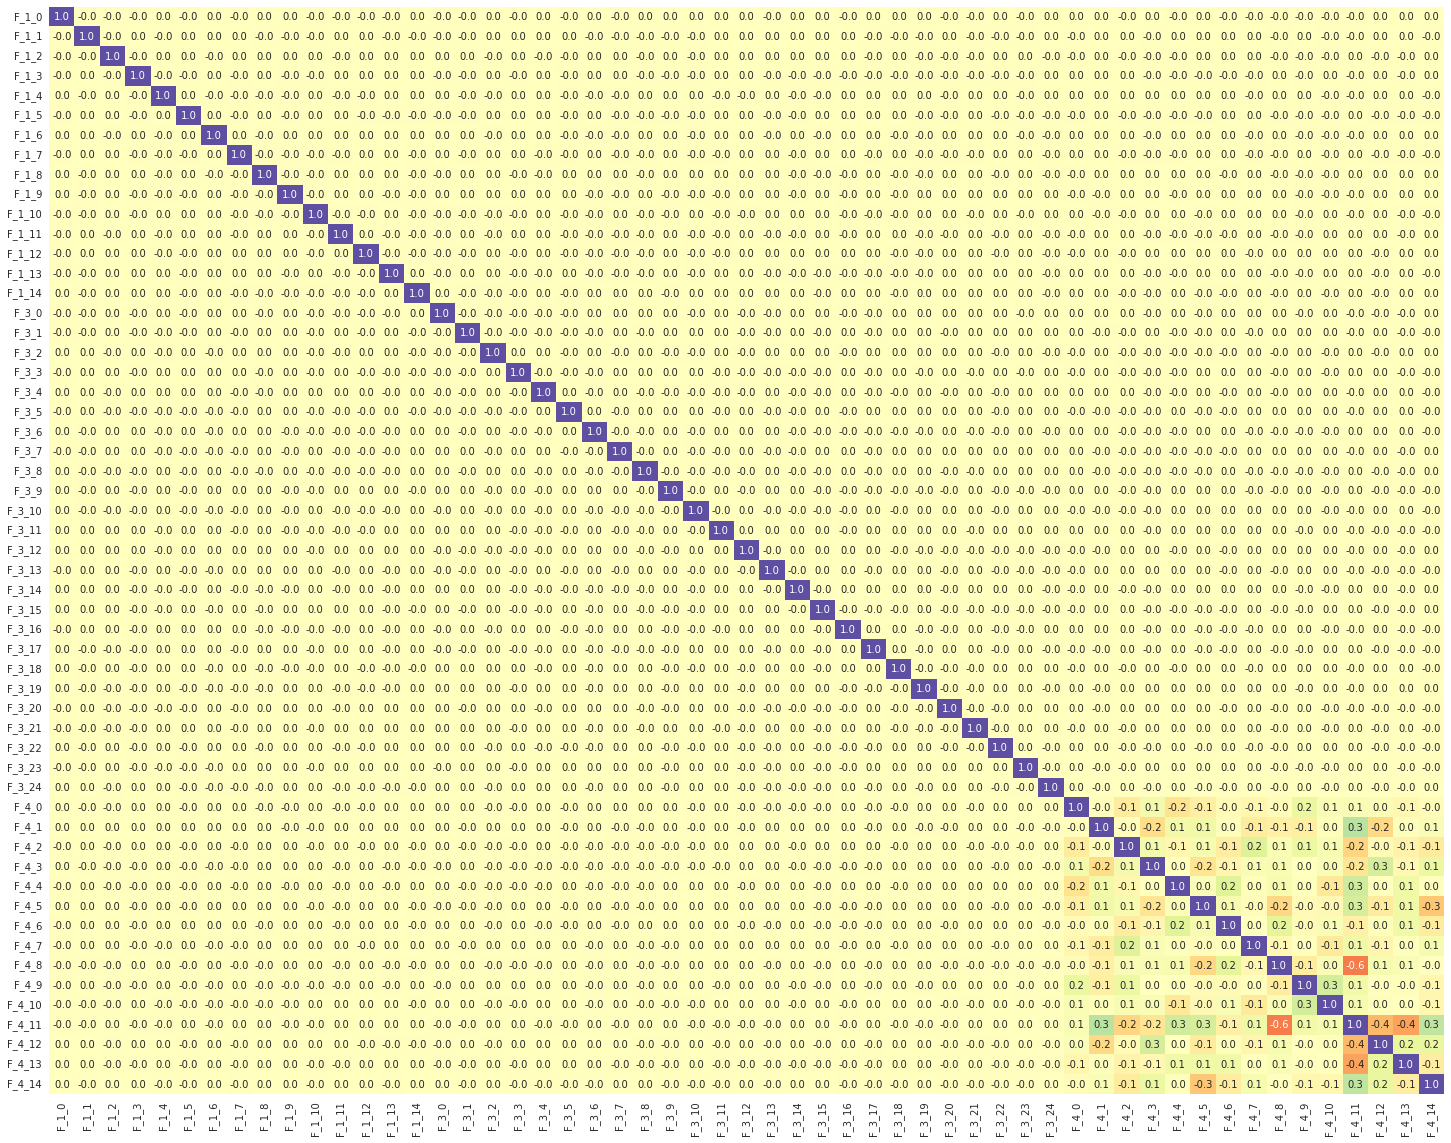

In [11]:
plt.subplots(figsize=(25,20))
sns.heatmap(df[float_cols].corr(), annot= True, cmap="Spectral", fmt = '0.1f', vmin=-1, vmax=1, cbar=False);

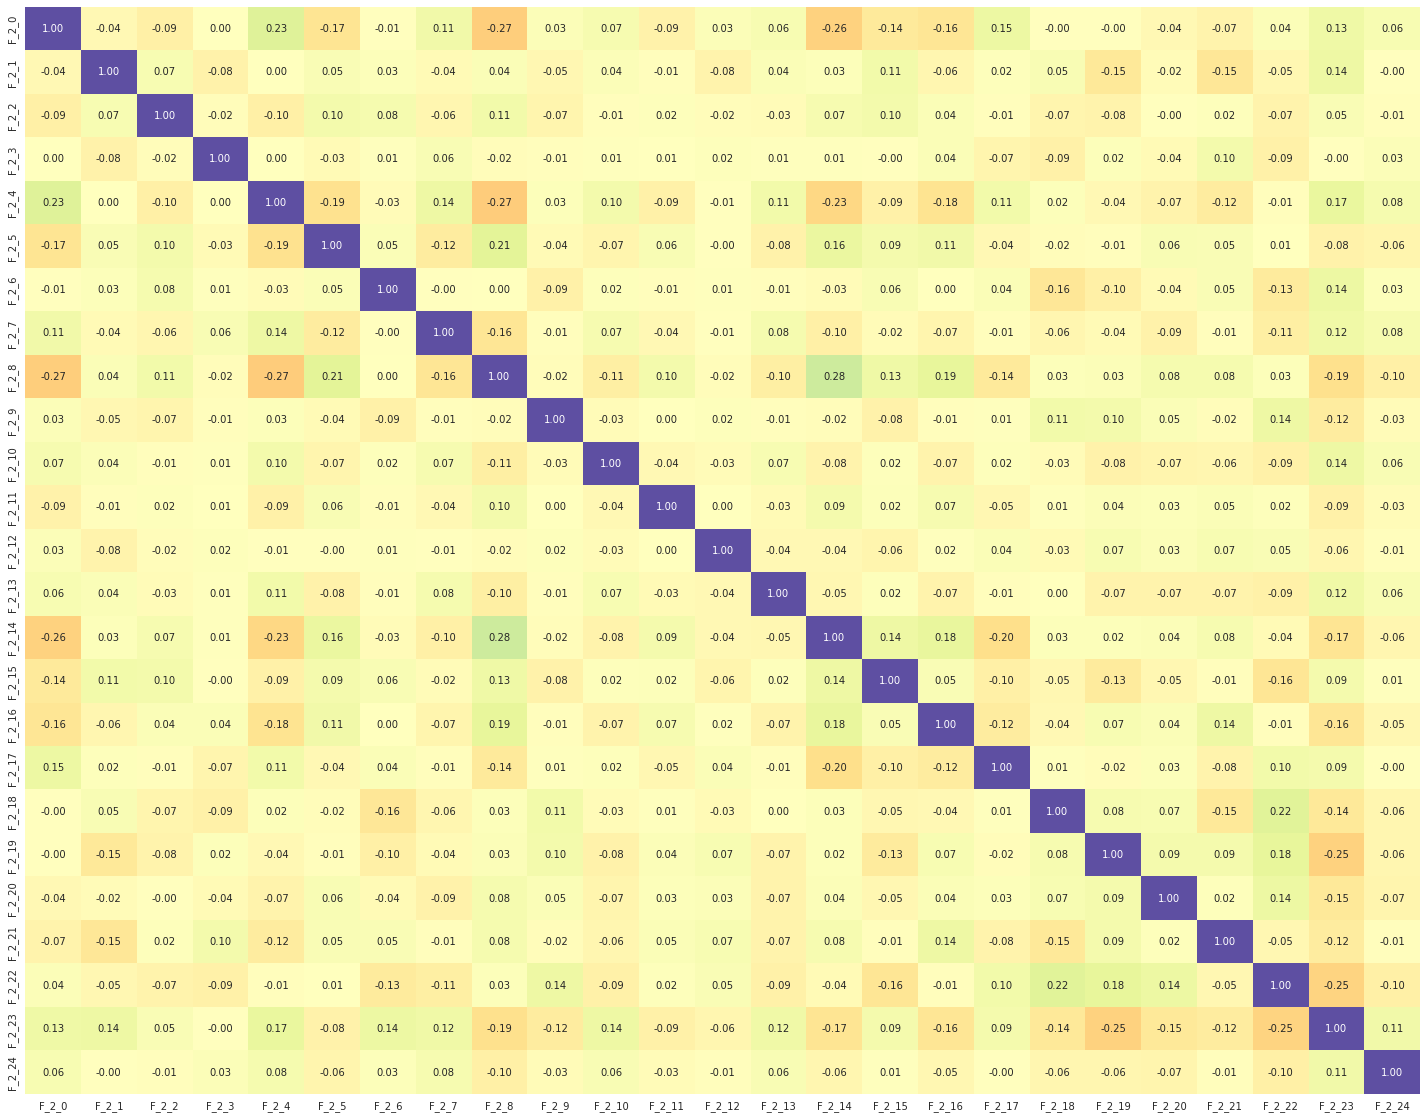

In [12]:
plt.subplots(figsize=(25,20))
sns.heatmap(df[int_cols].corr(), annot= True, cmap="Spectral", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);